# Preparing Los Angeles weather station data

In [19]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [85]:
#read dataset
df = pd.read_csv("../data/GSOD/merged_cities/LOS ANGELES DOWNTOWN USC.csv")

In [86]:
df

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,0,99999993134,1999-07-01,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",67.8,15,59.4,...,8.0,999.9,75.9,*,63.0,*,0.0,I,999.9,100000
1,1,99999993134,1999-07-02,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",67.3,24,59.6,...,8.0,999.9,75.0,*,64.0,*,0.0,I,999.9,100000
2,2,99999993134,1999-07-03,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",66.0,24,58.3,...,7.0,999.9,73.0,*,62.1,*,0.0,I,999.9,0
3,3,99999993134,1999-07-04,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",67.4,24,60.1,...,7.0,999.9,73.9,*,64.0,*,0.0,I,999.9,0
4,4,99999993134,1999-07-05,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",69.2,24,60.8,...,7.0,999.9,82.0,*,61.0,*,0.0,I,999.9,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,7437,72287493134,2019-11-14,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",63.2,24,54.5,...,4.1,999.9,73.0,,57.0,,0.0,G,999.9,0
7438,7438,72287493134,2019-11-15,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",63.9,24,54.7,...,5.1,999.9,72.0,,57.0,,0.0,G,999.9,0
7439,7439,72287493134,2019-11-16,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",64.5,24,53.5,...,4.1,999.9,80.1,,53.1,,0.0,G,999.9,0
7440,7440,72287493134,2019-11-17,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",70.1,24,46.2,...,4.1,999.9,91.9,,53.1,,0.0,G,999.9,0


In [87]:
# drop old index column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

# drop redundant column swith info about weather station
df.drop(["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME"], axis=1, inplace=True)

# drop "attributes"
df.drop(["TEMP_ATTRIBUTES", "DEWP_ATTRIBUTES", "SLP_ATTRIBUTES", "STP_ATTRIBUTES", 
         "VISIB_ATTRIBUTES", "WDSP_ATTRIBUTES", "MAX_ATTRIBUTES", "MIN_ATTRIBUTES", "PRCP_ATTRIBUTES"], 
        axis=1, inplace=True)

# drop redundant weather info (max speed of wind, maximum wind gust, min and max temperature, snow depth,  
# indicator for occurrence of: fog, rain or drizzle, snow or ice pellets, hail, thunder, 
# tornado/funnel cloud respectively )
df.drop(["MXSPD", "GUST", "MAX", "MIN", "SNDP", "FRSHTT"], axis=1, inplace=True)

In [88]:
# change index
df.set_index([pd.to_datetime(df.DATE)], inplace=True)
df.drop(["DATE"], axis=1, inplace=True)

In [89]:
df.head()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
DATE,,,,,,,
1999-07-01,67.8,59.4,1010.1,999.9,5.7,1.9,0.0
1999-07-02,67.3,59.6,1009.0,999.9,8.2,3.2,0.0
1999-07-03,66.0,58.3,1009.6,999.9,9.9,3.2,0.0
1999-07-04,67.4,60.1,1011.3,999.9,8.4,3.0,0.0
1999-07-05,69.2,60.8,1011.6,999.9,6.9,2.4,0.0


__Missing data handling__

In [90]:
df.isna().sum()

TEMP     0
DEWP     0
SLP      0
STP      0
VISIB    0
WDSP     0
PRCP     0
dtype: int64

As we can see, there are no nans in the data

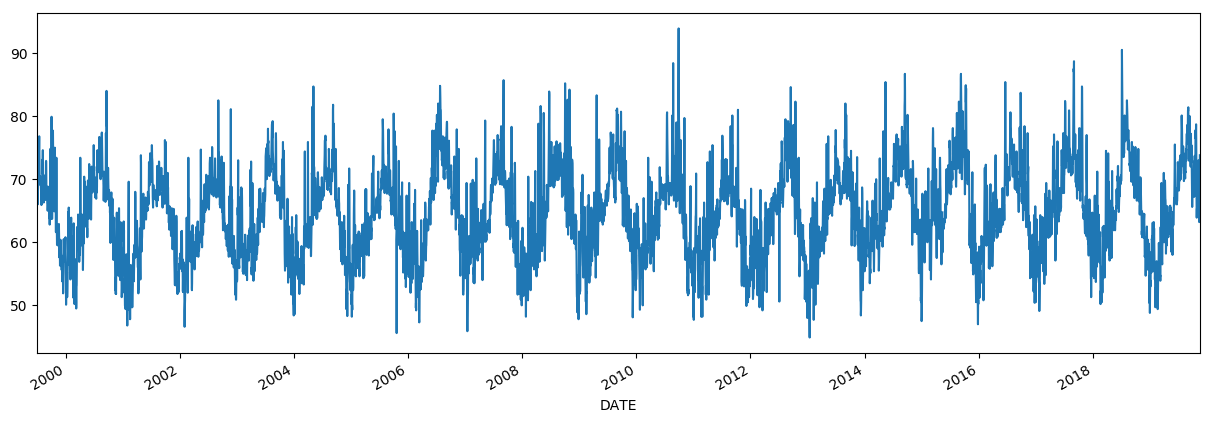

In [91]:
df.TEMP.plot()

There is an half of data for 1999 year, so it is better to drop it and use only 20 years for further prediction

In [92]:
df = df.loc["2000-01-01":, :]
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
DATE,,,,,,,
2000-01-01,50.1,46.2,1018.5,999.9,6.3,0.8,99.99
2000-01-02,52.3,38.2,1019.7,999.9,9.4,3.1,0.00
2000-01-03,53.1,25.5,1024.8,999.9,9.9,1.9,0.00
2000-01-04,54.2,33.4,1027.1,999.9,9.9,1.6,0.00
2000-01-05,54.9,37.5,1018.8,999.9,9.7,1.2,0.00
...,...,...,...,...,...,...,...
2019-11-14,63.2,54.5,1017.3,11.4,5.9,0.8,0.00
2019-11-15,63.9,54.7,1018.5,11.7,7.6,0.9,0.00
2019-11-16,64.5,53.5,1014.7,7.9,7.6,0.3,0.00


In [93]:
all_days = [str(day)[4:10] for day in pd.date_range(start='1/1/' + "2018", end='1/1/' + "2019")[:-1]]
missing_days = []

for year in range(2000, 2019):
    for day in all_days:
        if (str(year) + day not in df.index):
            missing_days.append(str(year) + day)
missing_days            

['2000-09-13', '2000-09-14', '2018-03-25', '2018-03-26']

There are few missing days, lets impute them.

In [94]:
def insert_day(df, date, all_days):
    first =  df.loc[:date, :]
    second = df.loc[date:, :]
    day = {col:[column_mean(df, col, date)] for col in df.columns}
    
    return pd.concat([first, pd.DataFrame(data=day, index=[pd.to_datetime(date)]), second])

In [95]:
for day in missing_days:
    df = insert_day(df, day, all_days)

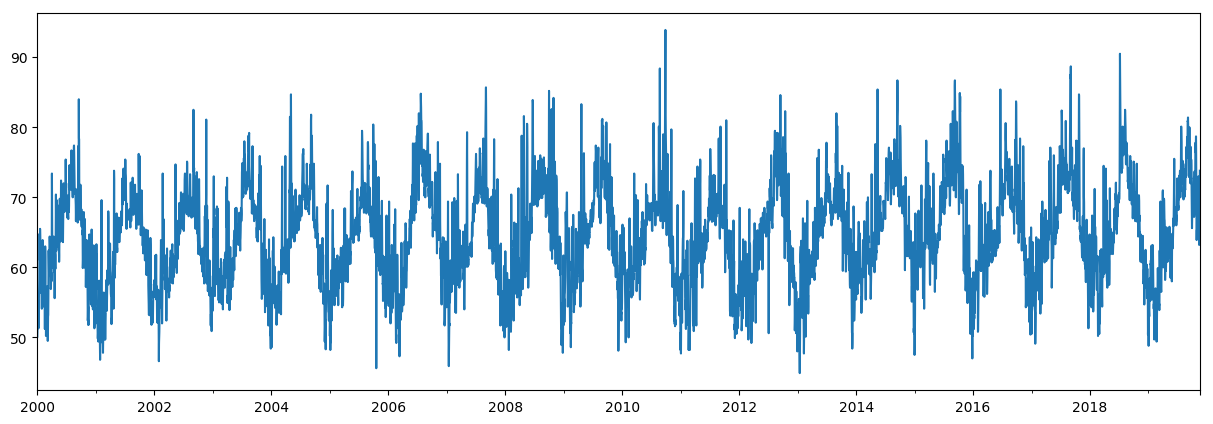

In [96]:
df.TEMP.plot()

__Data reduction__

As we have daily data for 30 years (more that 10,000 instances), it will take a lot of time to fit good model for such big data. Here I reduce daily data to weekly, by taking mean of whole week as value of that one week 

In [97]:
# returns dict with mean values of corresponding column at the certain week 
def week_mean(df, date):
    week = dict()
    
    digits = list(date)
    digits[-2:] = str(int("".join(digits[-2:])) + 6)
    end = "".join(digits)
    
    data = df.loc[date:end, :]
    
    for col in data.columns:
        week[col] = data[col].mean()
    
    return week

In [98]:
# generates month data
def create_month_data(df, year_n_month):
    month = dict()
    for col in df.columns:
        month[col] = []
    
    checkpoints = ["-01", "-08", "-15", "-22"]
    indexes = [year_n_month + day for day in checkpoints]
    
    for idx in indexes:
        week = week_mean(df, idx)
        for i in month.keys():
            month[i].append(week[i])
            
    new_month = pd.DataFrame(data=month, index=indexes)
    
    return new_month

In [99]:
def reduce_dataset(df):
    months = [str(year_n_month)[:7] for year_n_month in df.index if str(year_n_month)[8:10] == "01"]

    new_months = [create_month_data(df, month) for month in months]
    
    df = pd.concat(new_months)
    
    return df

In [100]:
df =  reduce_dataset(df)

In [101]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
2000-01-01,53.542857,35.100000,1022.214286,999.900000,9.014286,1.571429,14.284286
2000-01-08,55.942857,45.571429,1020.728571,999.900000,6.400000,1.142857,0.000000
2000-01-15,62.985714,51.714286,1018.885714,999.900000,9.128571,1.300000,42.852857
2000-01-22,57.885714,48.485714,1018.742857,999.900000,6.971429,1.500000,57.137143
2000-02-01,60.600000,43.785714,1021.357143,999.900000,8.714286,1.714286,0.000000
...,...,...,...,...,...,...,...
2019-10-22,74.728571,42.342857,1012.214286,5.900000,9.928571,0.957143,0.000000
2019-11-01,65.785714,39.814286,1015.514286,9.100000,8.357143,0.942857,0.000000
2019-11-08,66.600000,52.642857,1016.142857,9.771429,6.200000,0.900000,0.000000
2019-11-15,68.075000,45.550000,1014.925000,8.375000,8.675000,0.775000,0.000000


In [102]:
df[df.TEMP.isnull()].index.tolist()

['2019-11-22']

As we can see, during data reduction new missing values appear, so here I impute them

In [103]:
for indx in df[df.TEMP.isnull()].index.tolist():
    for col in df.columns:
        df.xs(indx)[col] = column_mean(df, col, indx)

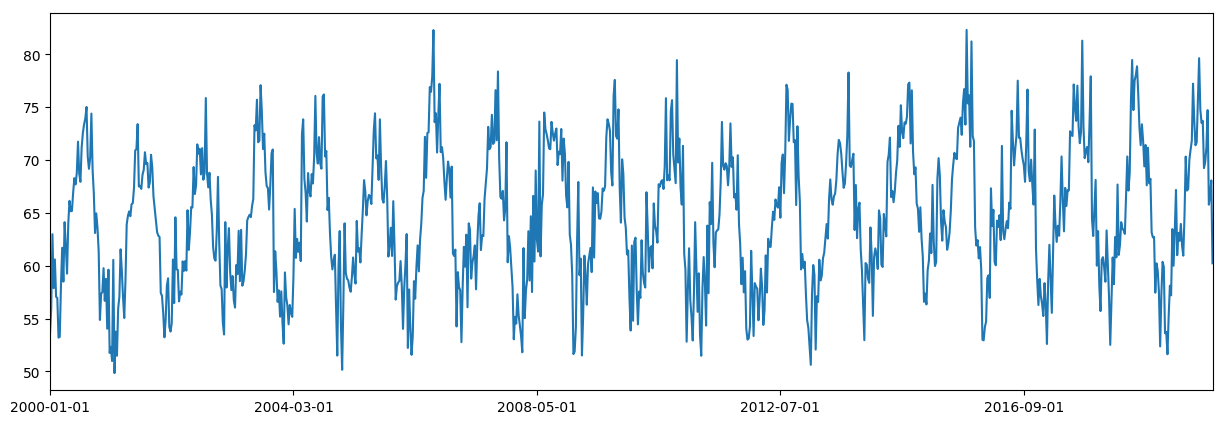

In [104]:
df.TEMP.plot()

Now, our data is cleaned, reduced in more than 7 times and without missing values

In [105]:
df.describe()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,64.544291,53.221768,1032.381607,260.453835,9.490664,3.315418,1.094991
std,6.474248,65.825922,189.457547,428.660009,19.490048,34.809859,7.212633
min,49.842857,20.428571,1008.385714,2.571429,3.000000,0.285714,0.000000
25%,59.628571,43.725000,1012.753571,6.828571,7.942857,1.214286,0.000000
50%,64.257143,51.542857,1014.571429,9.714286,9.000000,1.542857,0.000000
75%,69.539286,58.175000,1017.075000,842.937970,9.575000,2.021429,0.011429
max,82.314286,1477.942857,4864.214286,999.900000,575.642857,999.900000,85.705714


__Outliers__

In [106]:
def replace_outliers(df, column):
    m = df[column].mean()
    std = df[column].std()
    
    for index, row in df.iterrows():
        if (abs(row[column]) > m + 3 * std):
            df.xs(index)[column] = column_mean(df, column, index)
    return df

In all columns, except TEMP and STP column, there are some outliers, so lets replace them with mean value.

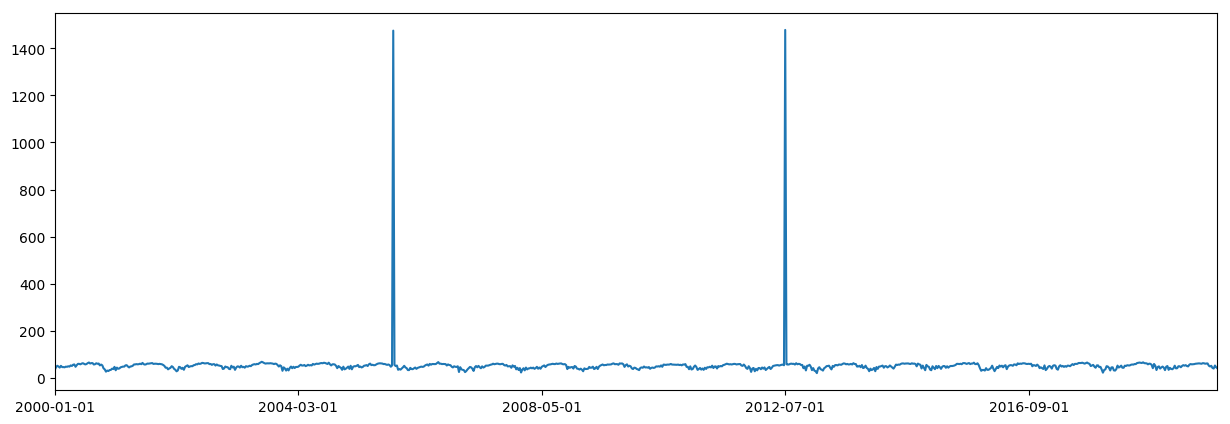

In [107]:
df.DEWP.plot()

In [110]:
df = replace_outliers(df, "DEWP")

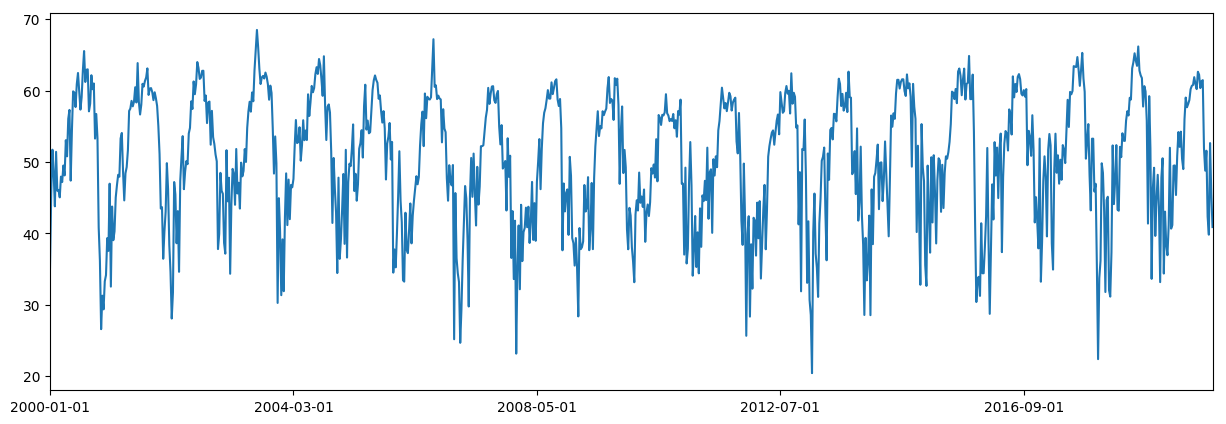

In [113]:
df.DEWP.plot()

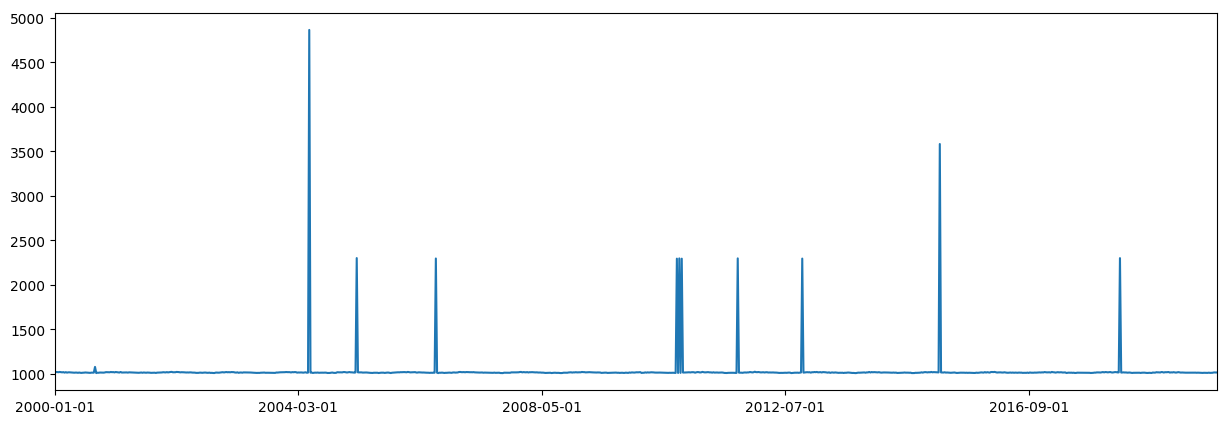

In [114]:
df.SLP.plot()

In [115]:
df = replace_outliers(df, "SLP")

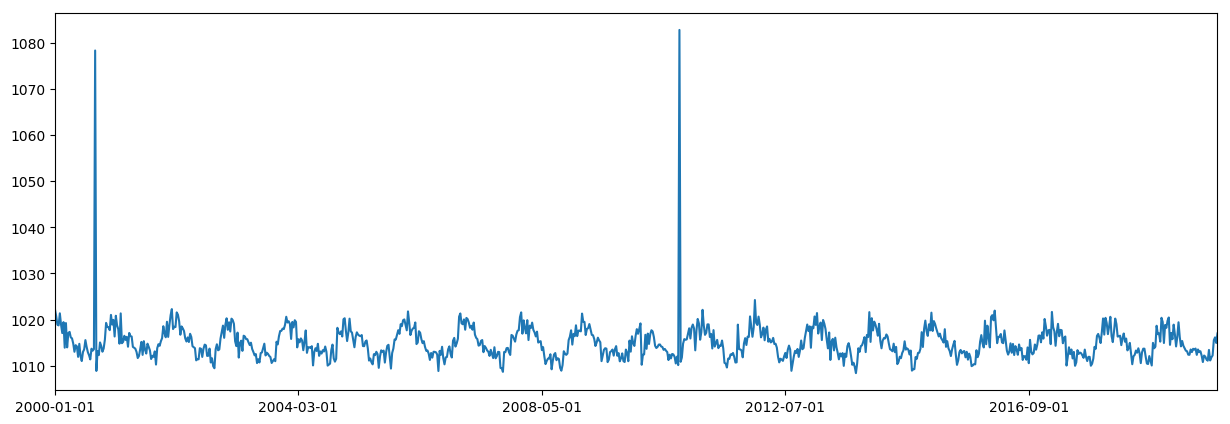

In [116]:
df.SLP.plot()

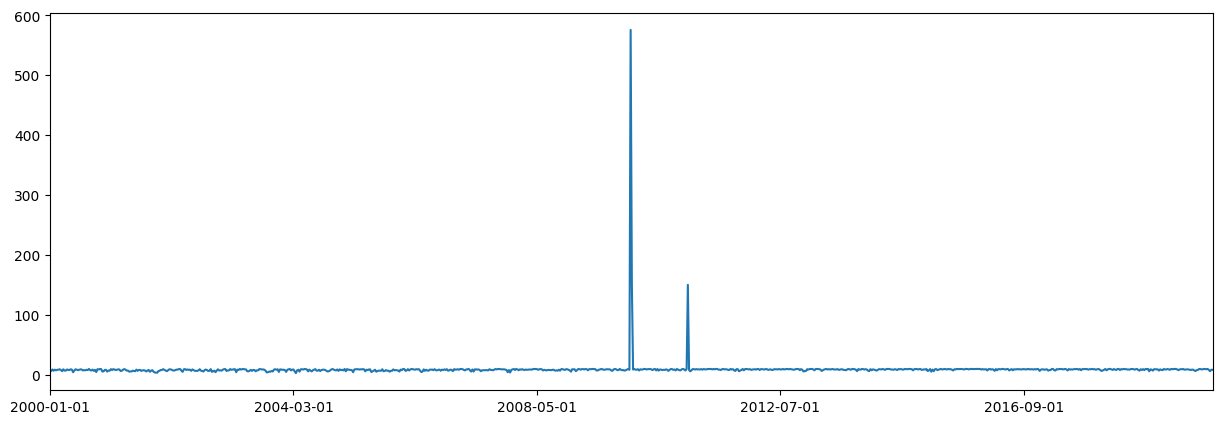

In [120]:
df.VISIB.plot()

In [121]:
df = replace_outliers(df, "VISIB")

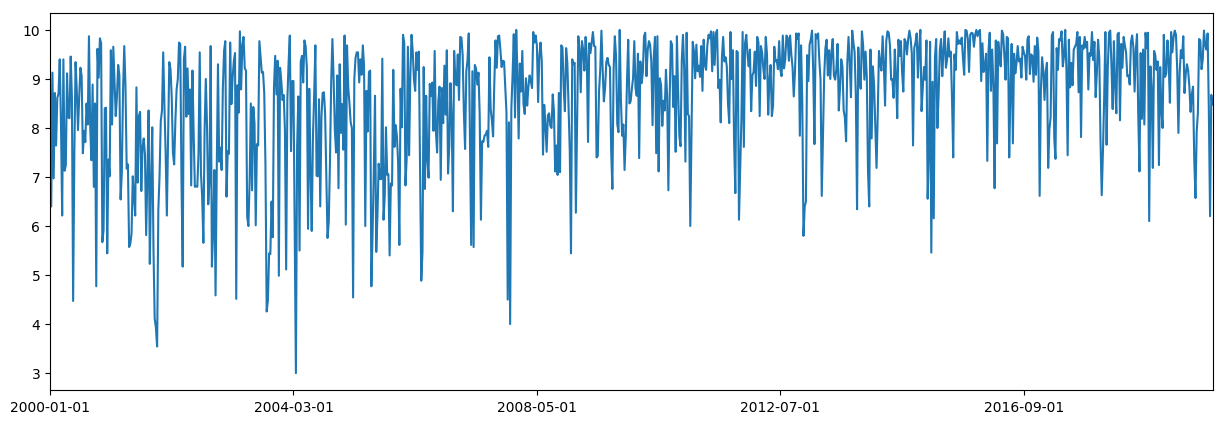

In [122]:
df.VISIB.plot()

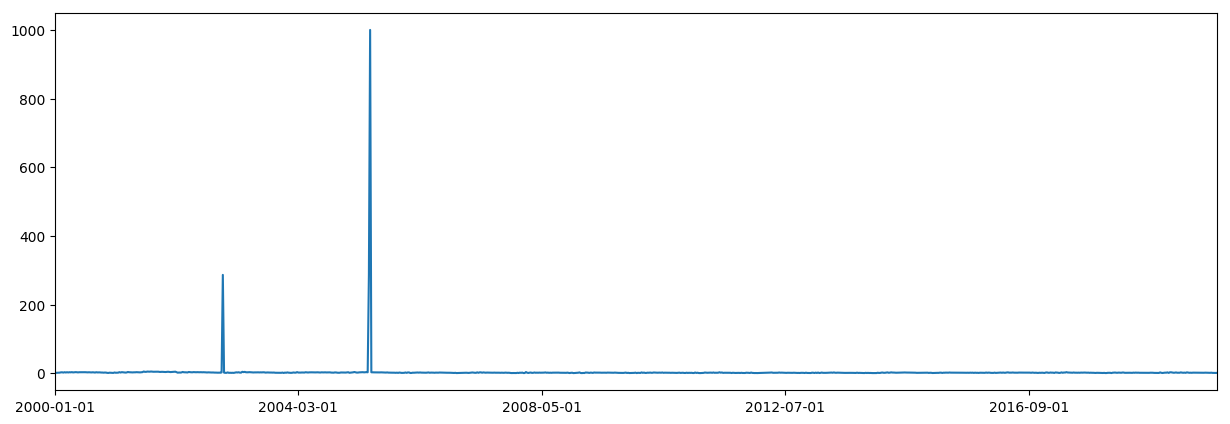

In [123]:
df.WDSP.plot()

In [124]:
df = replace_outliers(df, "WDSP")

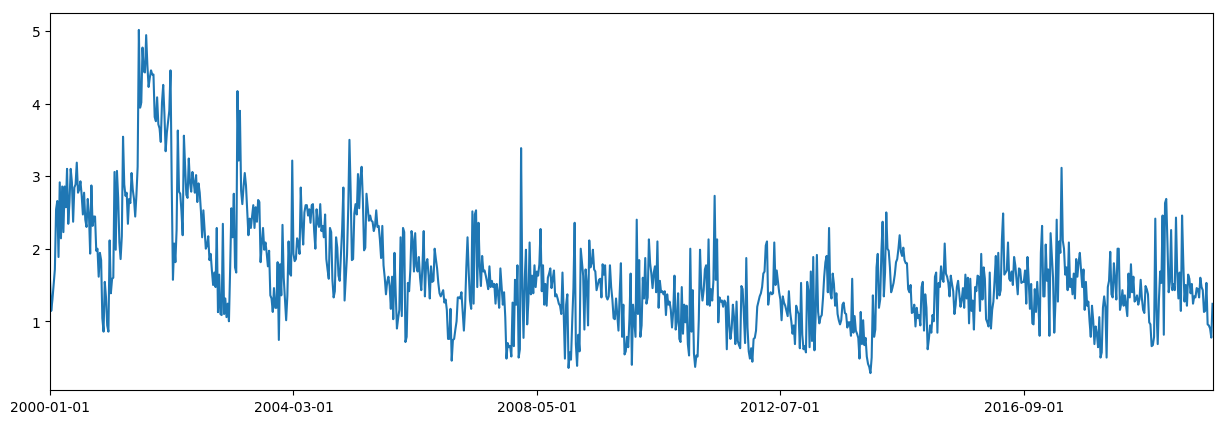

In [125]:
df.WDSP.plot()

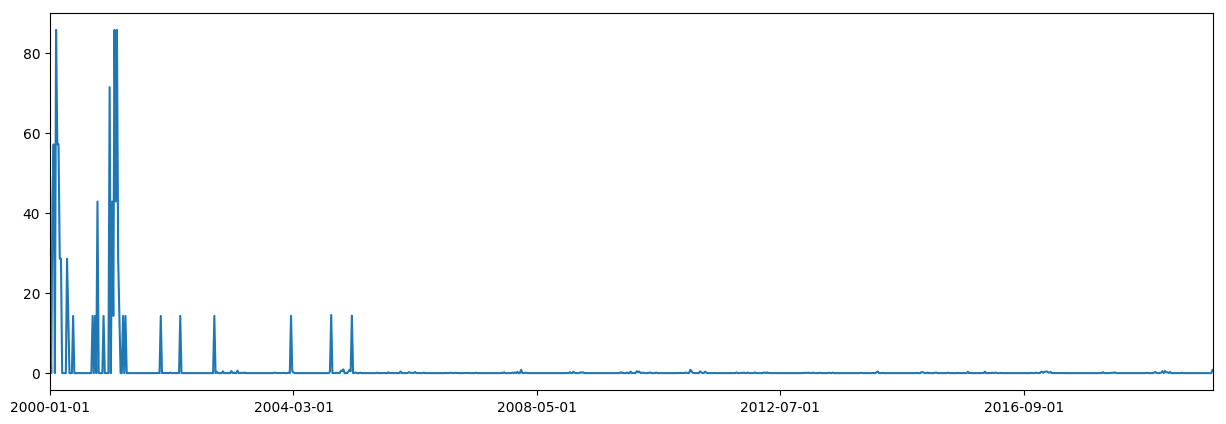

In [126]:
df.PRCP.plot()

In [127]:
df = replace_outliers(df, "PRCP")

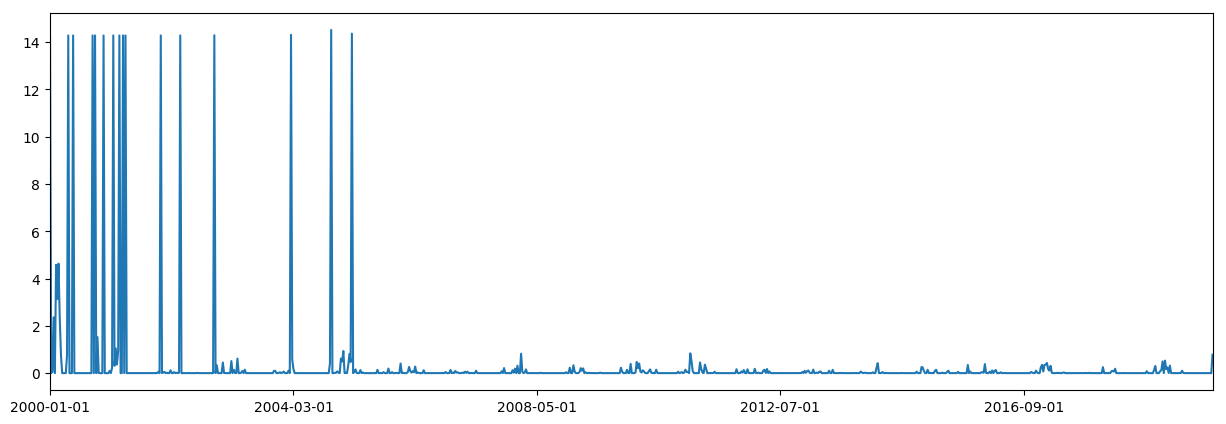

In [128]:
df.PRCP.plot()

In [130]:
df.to_csv("../analysis/Los_Angeles.csv")